In [1]:
import os
os.getcwd()    

'C:\\Users\\SRADHA\\Desktop\\Projects\\Banking Domain'

In [2]:
#Import all the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

import warnings
warnings.filterwarnings('ignore')

import sklearn
import scipy

from pylab import rcParams
rcParams['figure.figsize']=16,12
RANDOM_SEED=101
LABELS=['Normal','Fraud']

In [3]:
# import the dataset
data=pd.read_csv('CreditCard.csv',sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data Preprocessing

In [4]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no null values.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Exploratory Data Analysis

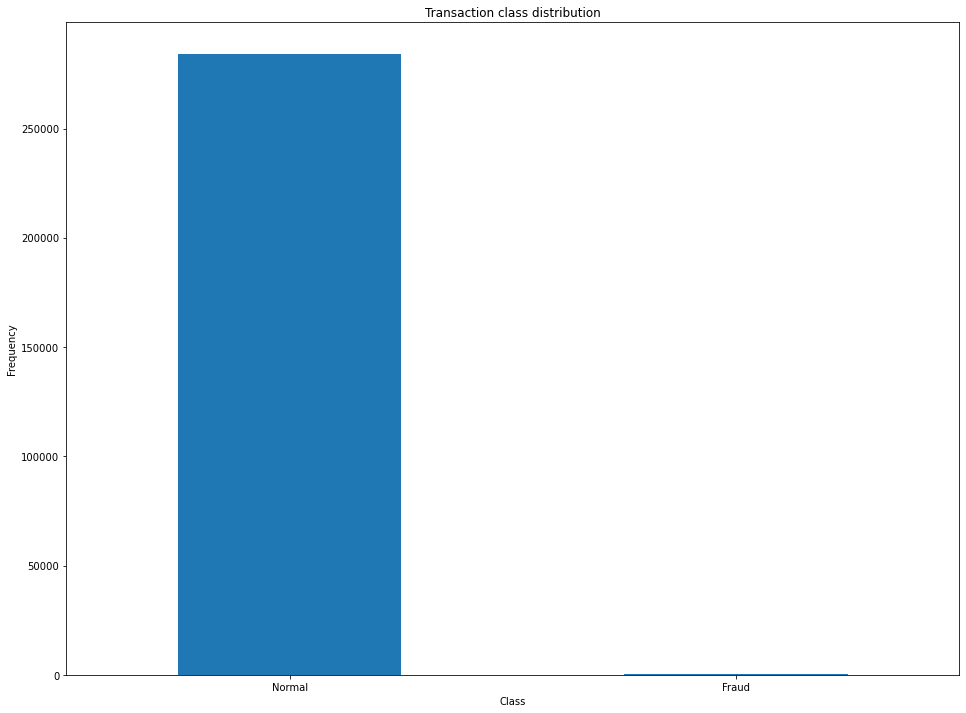

In [6]:
count_classes=pd.value_counts(data['Class'],sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title('Transaction class distribution')
plt.xticks(range(2),LABELS)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [7]:
fraud=data[data['Class']==1]
normal=data[data['Class']==0]

print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [52]:
outlier_fraction = len(fraud)/len(normal)
outlier_fraction

0.0017304750013189597

In [8]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [9]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

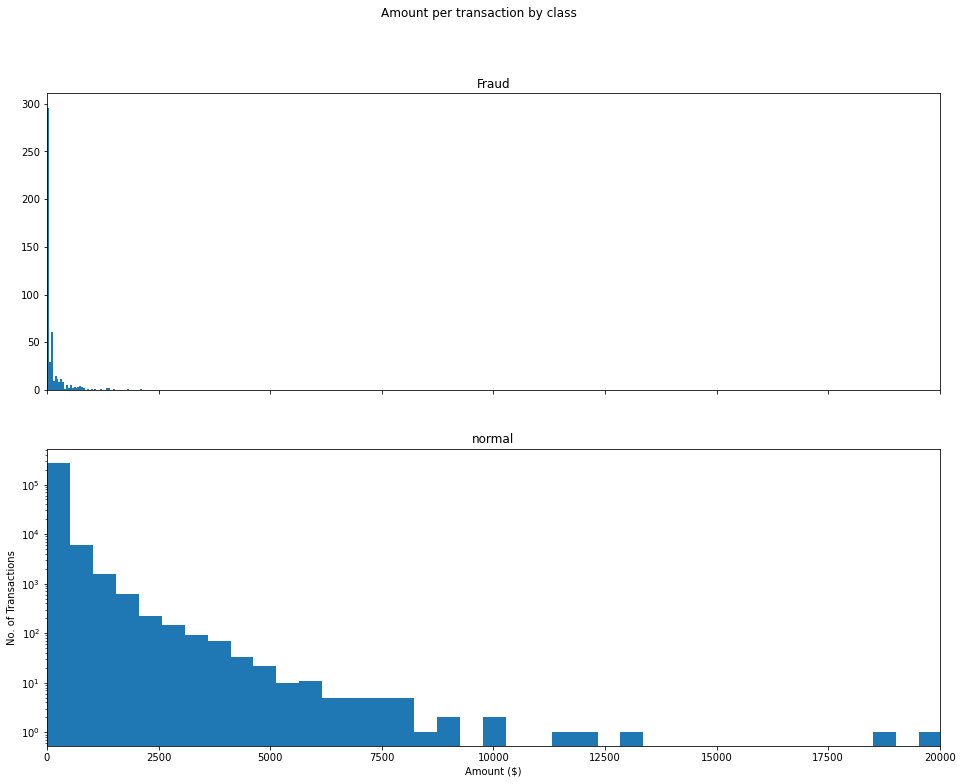

In [10]:
f, (ax1,ax2)=plt.subplots(2,1, sharex=True)
f.suptitle('Amount per transaction by class')
bins=50
ax1.hist(fraud.Amount, bins=bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount, bins=bins)
ax2.set_title('normal')

plt.xlabel("Amount ($)")
plt.ylabel("No. of Transactions")

plt.xlim(0,20000)
plt.yscale('log')

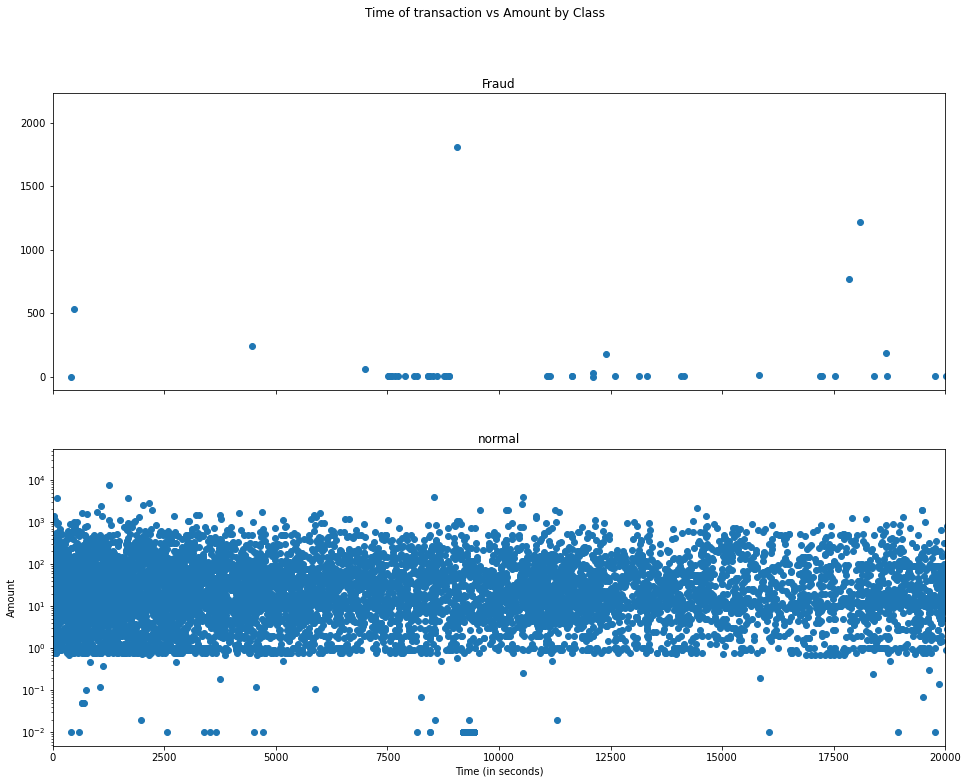

In [11]:
f, (ax1,ax2)=plt.subplots(2,1, sharex=True)
f.suptitle('Time of transaction vs Amount by Class')
bins=50
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('normal')

plt.xlabel("Time (in seconds)")
plt.ylabel("Amount")

plt.xlim(0,20000)
plt.yscale('log')

<AxesSubplot:xlabel='Time', ylabel='Density'>

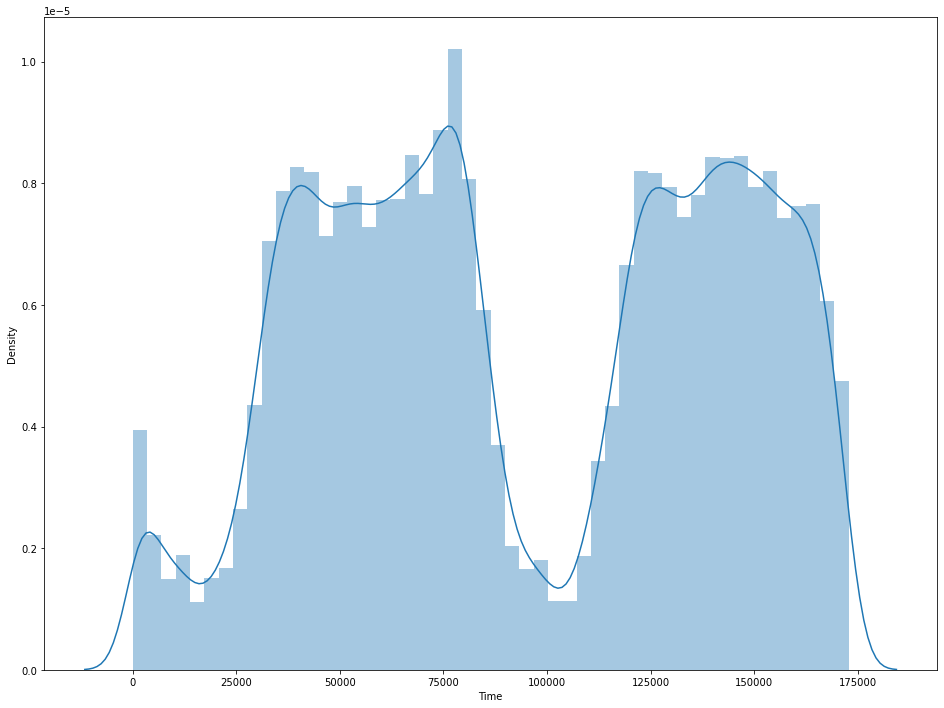

In [12]:
sns.distplot(data['Time'])

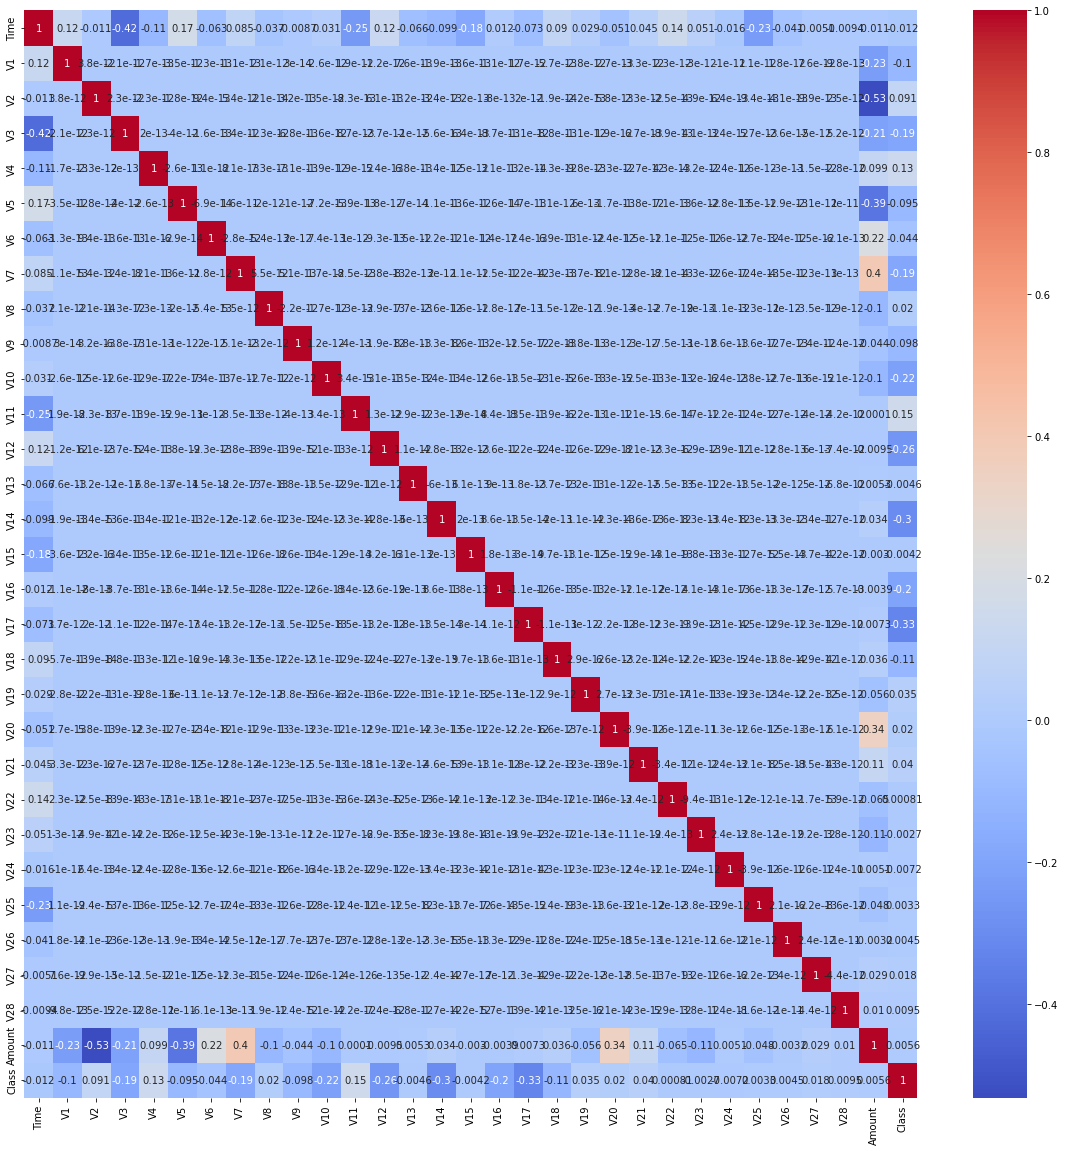

In [13]:
corrmat=data.corr()
top_corr_feature=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_feature].corr(),annot=True,cmap='coolwarm')

In [14]:
columns=data.columns.tolist()
columns

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [15]:
# Splitting the data into target and feature variables
columns=[c for c in columns if c not in ['Class']]
target='Class'
state=np.random.RandomState(101)
x=data[columns]
y=data[target]
x_outlier=state.uniform(low=1,high=1,size=(x.shape[0],x.shape[1]))
print(x.shape)
print(y.shape)

(284807, 30)
(284807,)


In [16]:
# Splitting the data into train and test data for building the model and prediction
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=110)

# Logistic Regression Model

In [17]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression()
logit.fit(x_train,y_train)

LogisticRegression()

In [18]:
y_pred_train_lg=logit.predict(x_train)
y_pred_test_lg=logit.predict(x_test)

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score

In [20]:
print('Classification Report of Training Dataset:\n',classification_report(y_train,y_pred_train_lg))
print('####'*20)
print('Classification Report of Training Dataset:\n',classification_report(y_test,y_pred_test_lg))

Classification Report of Training Dataset:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    213225
           1       0.69      0.64      0.67       380

    accuracy                           1.00    213605
   macro avg       0.84      0.82      0.83    213605
weighted avg       1.00      1.00      1.00    213605

################################################################################
Classification Report of Training Dataset:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71090
           1       0.67      0.60      0.63       112

    accuracy                           1.00     71202
   macro avg       0.83      0.80      0.82     71202
weighted avg       1.00      1.00      1.00     71202



In [21]:
print('Confusion Matrix of Training Dataset:\n',confusion_matrix(y_train,y_pred_train_lg))
print('####'*20)
print('Confusion Matrix of Test Dataset:\n',confusion_matrix(y_test,y_pred_test_lg))

Confusion Matrix of Training Dataset:
 [[213115    110]
 [   135    245]]
################################################################################
Confusion Matrix of Test Dataset:
 [[71057    33]
 [   45    67]]


In [22]:
print('Accuracy Score of Training Dataset:',accuracy_score(y_train,y_pred_train_lg))
print('####'*20)
print('Accuracy Score of Test Dataset:',accuracy_score(y_test,y_pred_test_lg))

Accuracy Score of Training Dataset: 0.9988530231033917
################################################################################
Accuracy Score of Test Dataset: 0.9989045251537878


In [23]:
print('Precision score of Training Dataset:',precision_score(y_train,y_pred_train_lg))
print('####'*20)
print('Precision score of Training Dataset:',precision_score(y_test,y_pred_test_lg))

Precision score of Training Dataset: 0.6901408450704225
################################################################################
Precision score of Training Dataset: 0.67


# Decision Tree Model

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [25]:
y_pred_train_dt=dt.predict(x_train)
y_pred_test_dt=dt.predict(x_test)

In [26]:
print('Classification Report of Training Dataset:\n',classification_report(y_train,y_pred_train_dt))
print('####'*20)
print('Classification Report of Training Dataset:\n',classification_report(y_test,y_pred_test_dt))

Classification Report of Training Dataset:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    213225
           1       1.00      1.00      1.00       380

    accuracy                           1.00    213605
   macro avg       1.00      1.00      1.00    213605
weighted avg       1.00      1.00      1.00    213605

################################################################################
Classification Report of Training Dataset:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71090
           1       0.70      0.79      0.74       112

    accuracy                           1.00     71202
   macro avg       0.85      0.90      0.87     71202
weighted avg       1.00      1.00      1.00     71202



In [27]:
print('Confusion Matrix of Training Dataset:\n',confusion_matrix(y_train,y_pred_train_dt))
print('####'*20)
print('Confusion Matrix of Test Dataset:\n',confusion_matrix(y_test,y_pred_test_dt))

Confusion Matrix of Training Dataset:
 [[213225      0]
 [     0    380]]
################################################################################
Confusion Matrix of Test Dataset:
 [[71052    38]
 [   23    89]]


In [28]:
print('Accuracy Score of Training Dataset:',accuracy_score(y_train,y_pred_train_dt))
print('####'*20)
print('Accuracy Score of Test Dataset:',accuracy_score(y_test,y_pred_test_dt))

Accuracy Score of Training Dataset: 1.0
################################################################################
Accuracy Score of Test Dataset: 0.9991432824920649


In [29]:
print('Precision score of Training Dataset:',precision_score(y_train,y_pred_train_dt))
print('####'*20)
print('Precision score of Training Dataset:',precision_score(y_test,y_pred_test_dt))

Precision score of Training Dataset: 1.0
################################################################################
Precision score of Training Dataset: 0.7007874015748031


# Random Forest Model

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=500,criterion='entropy')
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [31]:
y_pred_train_rf=rf.predict(x_train)
y_pred_test_rf=rf.predict(x_test)

In [32]:
print('Classification Report of Training Dataset:\n',classification_report(y_train,y_pred_train_rf))
print('####'*20)
print('Classification Report of Training Dataset:\n',classification_report(y_test,y_pred_test_rf))

Classification Report of Training Dataset:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    213225
           1       1.00      1.00      1.00       380

    accuracy                           1.00    213605
   macro avg       1.00      1.00      1.00    213605
weighted avg       1.00      1.00      1.00    213605

################################################################################
Classification Report of Training Dataset:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71090
           1       0.99      0.80      0.89       112

    accuracy                           1.00     71202
   macro avg       0.99      0.90      0.94     71202
weighted avg       1.00      1.00      1.00     71202



In [33]:
print('Confusion Matrix of Training Dataset:\n',confusion_matrix(y_train,y_pred_train_rf))
print('####'*20)
print('Confusion Matrix of Test Dataset:\n',confusion_matrix(y_test,y_pred_test_rf))

Confusion Matrix of Training Dataset:
 [[213225      0]
 [     0    380]]
################################################################################
Confusion Matrix of Test Dataset:
 [[71089     1]
 [   22    90]]


In [34]:
print('Accuracy Score of Training Dataset:',accuracy_score(y_train,y_pred_train_rf))
print('####'*20)
print('Accuracy Score of Test Dataset:',accuracy_score(y_test,y_pred_test_rf))

Accuracy Score of Training Dataset: 1.0
################################################################################
Accuracy Score of Test Dataset: 0.9996769753658605


# XGBoost Model

In [37]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\SRADHA\\AppData\\Local\\Temp\\pip-uninstall-9knu29j6\\core\\_multiarray_tests.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.1
    Uninstalling numpy-1.23.1:
      Successfully uninstalled numpy-1.23.1


In [38]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [39]:
y_pred_train_xgb=xgb.predict(x_train)
y_pred_test_xgb=xgb.predict(x_test)

In [40]:
print('Classification Report of Training Dataset:\n',classification_report(y_train,y_pred_train_xgb))
print('####'*20)
print('Classification Report of Training Dataset:\n',classification_report(y_test,y_pred_test_xgb))

Classification Report of Training Dataset:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    213225
           1       1.00      1.00      1.00       380

    accuracy                           1.00    213605
   macro avg       1.00      1.00      1.00    213605
weighted avg       1.00      1.00      1.00    213605

################################################################################
Classification Report of Training Dataset:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71090
           1       0.99      0.82      0.90       112

    accuracy                           1.00     71202
   macro avg       0.99      0.91      0.95     71202
weighted avg       1.00      1.00      1.00     71202



In [41]:
print('Confusion Matrix of Training Dataset:\n',confusion_matrix(y_train,y_pred_train_xgb))
print('####'*20)
print('Confusion Matrix of Test Dataset:\n',confusion_matrix(y_test,y_pred_test_xgb))

Confusion Matrix of Training Dataset:
 [[213225      0]
 [     0    380]]
################################################################################
Confusion Matrix of Test Dataset:
 [[71089     1]
 [   20    92]]


In [42]:
print('Accuracy Score of Training Dataset:',accuracy_score(y_train,y_pred_train_xgb))
print('####'*20)
print('Accuracy Score of Test Dataset:',accuracy_score(y_test,y_pred_test_xgb))

Accuracy Score of Training Dataset: 1.0
################################################################################
Accuracy Score of Test Dataset: 0.9997050644644814


# Stacking Classifier Model

In [43]:
pip install mlxtend

In [45]:
from mlxtend.classifier import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [48]:
clf1 = KNeighborsClassifier(n_neighbors=5)
clf2 = GaussianNB()
clf3 = RandomForestClassifier()
clf4 = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3],meta_classifier=clf4)

print('3-fold cross validation : \n')

for clf, label in zip([clf1, clf2, clf3,sclf], ['KNN','Naive Bayes Theorem', 'Random Forest',
                                               'Stacking Classifier']):
    scores = cross_val_score(clf, x, y, cv=3, scoring = 'accuracy')
    print("Accuracy : %0.2f (+/-%0.2f)[%s]" % (scores.mean(), scores.std(), label))

3-fold cross validation : 

Accuracy : 0.49 (+/-0.40)[KNN]
Accuracy : 0.99 (+/-0.00)[Naive Bayes Theorem]
Accuracy : 0.67 (+/-0.47)[Random Forest]
Accuracy : 0.67 (+/-0.47)[Stacking Classifier]


# Isolation Forest

In [49]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [53]:
Classification = {"Isolation Forest" : IsolationForest(n_estimators=100,max_samples=len(x),contamination =outlier_fraction),                                   
                "Local Outlier Factor" : LocalOutlierFactor(n_neighbors=20, contamination=outlier_fraction),
                 "One Class SVM" : OneClassSVM()}

In [54]:
n_outlier = len(fraud)

for i, (clf_name, clf) in enumerate(Classification.items()):
    if clf_name =='Local Outlier Factor' :
        y_pred = clf.fit_predict(x)
        score_prediction = clf.negative_outlier_factor_
    elif clf_name =="One Class SVM" :
        clf.fit(x)
        y_pred = clf.predict(x)
        
    else:
        clf.fit(x)
        score_prediction = clf.decision_function(x)
        y_pred = clf.predict(x)
        
    y_pred[y_pred==1]= 0
    y_pred[y_pred==-1] = 1
    n_error = (y_pred !=y).sum()
    
    
    print("{} : {}".format(clf_name, n_error))
    print("Accuracy Score :")
    
    print(accuracy_score(y, y_pred))
    print("Classification Report :")
    print(classification_report(y, y_pred))

Isolation Forest : 657
Accuracy Score :
0.9976931746761842
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.33      0.33      0.33       492

    accuracy                           1.00    284807
   macro avg       0.67      0.67      0.67    284807
weighted avg       1.00      1.00      1.00    284807

Local Outlier Factor : 935
Accuracy Score :
0.9967170750718908
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.05      0.05      0.05       492

    accuracy                           1.00    284807
   macro avg       0.52      0.52      0.52    284807
weighted avg       1.00      1.00      1.00    284807

One Class SVM : 142353
Accuracy Score :
0.5001773130576145
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.50     

Isolation Forest is better for fraudulent dataset.